# Homework 2: Julia set
by Rustam Guseyn-zade ([link canvas](https://skoltech.instructure.com/courses/3546/users/9673))

## Table of contents
* [Black and white contour](#Black-and-white-contour-($c$-is-constant))
* [Different colours](#Different-colours)
* [Julia set with inverted golden ratio](#Julia-set-with-inverted-golden-ratio)
* [Animation](#Animation)

In [1]:
# import needed libraries
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import os
from PIL import Image

## Black and white contour ($c$ is constant)

In [2]:
def converged_point(z, c, max_convergence = 100):
    convergence = 0
    while abs(z) <= 2 and convergence < max_convergence:
            z = z**2 + c
            convergence += 1
    return convergence / max_convergence

In [3]:
def pixels_matrix(c, fig_width, fig_height, zoom=100):
    width = fig_width * zoom
    height = fig_height * zoom
    x_range = (-1.5, 1.5)
    x_length = x_range[1] - x_range[0]
    y_range = (-1.0, 1.0)
    y_length = y_range[1] - y_range[0]

    pixels = np.zeros((height, width))
    for y in range(height):
        for x in range(width):
            real_part = x * x_length / width + x_range[0]
            im_part = y * y_length / height + y_range[0]
            z = complex(real_part, im_part)
            pixels[y][x] = converged_point(z, c)
    return pixels

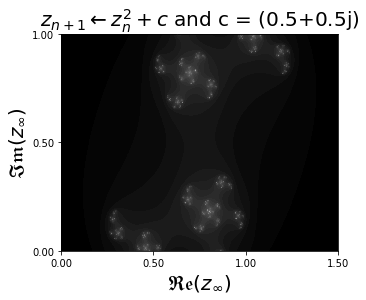

In [4]:
c = 0.5 + 0.5j
zoom = 100
fig_width, fig_height = (14, 11)
pixels = pixels_matrix(c, fig_width, fig_height, zoom)
fig, ax = plt.subplots()
ax.imshow(pixels, cmap='gray', interpolation='nearest')

x_locs = np.linspace(0, zoom*fig_width, 4)
y_locs = np.linspace(0, zoom*fig_height, 3)

plt.xticks(x_locs, ["{:.2f}".format(i*1.5) for i in x_locs / (zoom*fig_width)])
plt.yticks(y_locs, np.flip(["{:.2f}".format(i) for i in y_locs / (zoom*fig_height)]))
plt.title(r'$z_{n+1} \leftarrow z_n^2 + c$ and ' + f'c = {c}', fontsize=20)
plt.ylabel(r'$\mathfrak{Im}(z_\infty)$', fontsize=20)
plt.xlabel(r'$\mathfrak{Re}(z_\infty)$', fontsize=20)
plt.show()

## Different colours

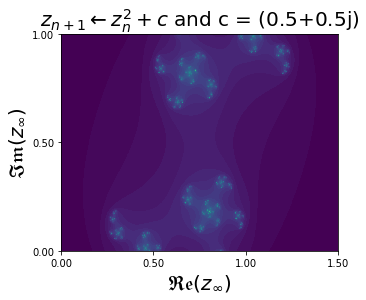

In [5]:
c = 0.5 + 0.5j
zoom = 100
fig_width, fig_height = (14, 11)
pixels = pixels_matrix(c, fig_width, fig_height, zoom)
fig, ax = plt.subplots()
ax.imshow(pixels, interpolation='nearest')

x_locs = np.linspace(0, zoom*fig_width, 4)
y_locs = np.linspace(0, zoom*fig_height, 3)

plt.xticks(x_locs, ["{:.2f}".format(i*1.5) for i in x_locs / (zoom*fig_width)])
plt.yticks(y_locs, np.flip(["{:.2f}".format(i) for i in y_locs / (zoom*fig_height)]))
plt.title(r'$z_{n+1} \leftarrow z_n^2 + c$ and ' + f'c = {c}', fontsize=20)
plt.ylabel(r'$\mathfrak{Im}(z_\infty)$', fontsize=20)
plt.xlabel(r'$\mathfrak{Re}(z_\infty)$', fontsize=20)
plt.show()

## Julia set with inverted golden ratio

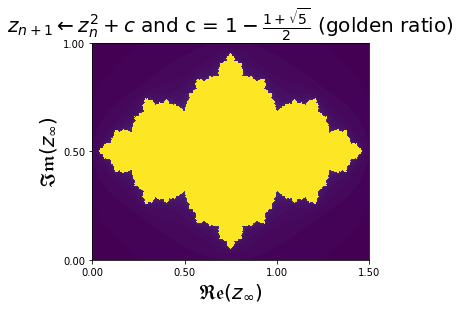

In [6]:
c = 1.0 - (1.0 + math.sqrt(5))/2.0

zoom = 100
fig_width, fig_height = (14, 11)
pixels = pixels_matrix(c, fig_width, fig_height, zoom)
fig, ax = plt.subplots()
ax.imshow(pixels, interpolation='nearest')

x_locs = np.linspace(0, zoom*fig_width, 4)
y_locs = np.linspace(0, zoom*fig_height, 3)

plt.xticks(x_locs, ["{:.2f}".format(i*1.5) for i in x_locs / (zoom*fig_width)])
plt.yticks(y_locs, np.flip(["{:.2f}".format(i) for i in y_locs / (zoom*fig_height)]))
plt.title(r'$z_{n+1} \leftarrow z_n^2 + c$ and c = $1 - \frac{1 + \sqrt{5}}{2}$ (golden ratio)', fontsize=20)
plt.ylabel(r'$\mathfrak{Im}(z_\infty)$', fontsize=20)
plt.xlabel(r'$\mathfrak{Re}(z_\infty)$', fontsize=20)
plt.show()

## Animation

Saved file could be obtained in file julia.gif+ 0.0000j


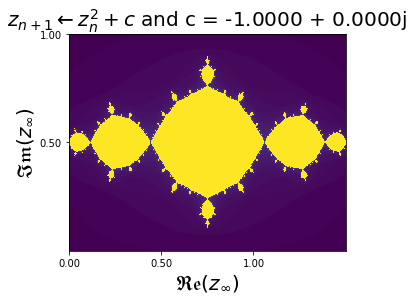

In [7]:
iterations = 600

fig, ax = plt.subplots()
c = [complex(math.cos(i), math.sin(i)) for i in np.linspace(0, math.pi, iterations)]
zoom = 100
fig_width, fig_height = (14, 11)

x_locs = np.linspace(0, zoom*fig_width, 4)
y_locs = np.linspace(0, zoom*fig_height, 3)
for i in range(iterations):
    print(f'generating picture number {i} for c = ' + '{:.4f}'.format(c[i].real) + ' + ' + '{:.4f}'.format(c[i].imag) + 'j', end='\r')
    image = pixels_matrix(c[i], fig_width, fig_height, zoom)
    plt.xticks(x_locs, ["{:.2f}".format(i*1.5) for i in x_locs / (zoom*fig_width)])
    plt.yticks(y_locs, np.flip(["{:.2f}".format(i) for i in y_locs / (zoom*fig_height)]))
    plt.title(r'$z_{n+1} \leftarrow z_n^2 + c$ and c = ' + '{:.4f}'.format(c[i].real) + ' + ' + '{:.4f}'.format(c[i].imag) + 'j', fontsize=20)
    plt.ylabel(r'$\mathfrak{Im}(z_\infty)$', fontsize=20)
    plt.xlabel(r'$\mathfrak{Re}(z_\infty)$', fontsize=20)
    plt.imshow(image, interpolation='nearest')
    plt.savefig('graph_' + '{0:05}'.format(i) + '.png')

fp_in = "graph_*.png"
fp_out = "julia.gif"

img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)
print(f"Saved file could be obtained in file {fp_out}")

for filePath in sorted(glob.glob(fp_in)):
        try:
            os.remove(filePath)
        except:
            print("Error while deleting file : ", filePath)